# **PROJECT: BINARY CLASSIFICATION ON 'CUSTOMER CHURN' USING KERAS**

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

In [2]:
import warnings
warnings.filterwarnings('ignore')

***Problem Statement:*
You are the Data Scientist at a telecom company “Leo” whose customers are churning out to its
competitors. You have to analyse the data of your company and find insights and stop your customers from
churning out to other telecom companies.**

In [3]:
#load data

data=pd.read_csv('customer_churn+(1).csv')
data.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

#EXPLORATORY DATA ANALYSIS

In [4]:
data.shape

(7043, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.duplicated().sum()

0

In [7]:
data['TotalCharges'].value_counts()   # This columns contains some missing values

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [8]:
data['TotalCharges']=data['TotalCharges'].replace(' ',np.nan)   #replace missing values with nan
data.dropna(inplace=True)          # drop nan values
data['TotalCharges']=data['TotalCharges'].astype('float32')   #change datatype of numerical column from object to float

In [11]:
#drop Customer ID column as every value is unique
data.drop(columns=['customerID'],axis=0,inplace=True)

**Data Manipulation:**

**Find the total number of male customers**

In [12]:
males=data[data['gender']=='Male'].shape[0]
print('The total number of male customers: ',males)

The total number of male customers:  3549


**Find the total number of customers whose Internet Service is ‘DSL’**

In [13]:
cust=data[data['InternetService']=='DSL'].shape[0]
print('the total number of customers whose Internet Service is ‘DSL’: ',cust)

the total number of customers whose Internet Service is ‘DSL’:  2416


**Extract all the Female senior citizens whose Payment Method is Mailed check & store the
result in ‘new_customer’**

In [14]:
new_customer=data[(data['gender']=='Female') & (data['PaymentMethod']=='Mailed check') & (data['SeniorCitizen']==1)]
print('Total no. of new_customer are: ',new_customer.shape[0])
new_customer.head()

Total no. of new_customer are:  50


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
139  Female              1     Yes         No       1          Yes   
176  Female              1      No         No      15          Yes   
267  Female              1      No         No      19          Yes   
451  Female              1      No         No      22          Yes   
470  Female              1      No         No      17          Yes   

    MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
139            No     Fiber optic                   No                   No   
176           Yes     Fiber optic                   No                   No   
267            No     Fiber optic                  Yes                  Yes   
451            No             DSL                  Yes                   No   
470            No              No  No internet service  No internet service   

        DeviceProtection          TechSupport          StreamingTV  \
139                   No                   No                   No   
176                   No                   No                   No   
267                   No                  Yes                  Yes   
451                  Yes                  Yes                   No   
470  No internet service  No internet service  No internet service   

         StreamingMovies        Contract PaperlessBilling PaymentMethod  \
139                   No  Month-to-month              Yes  Mailed check   
176                   No  Month-to-month              Yes  Mailed check   
267                  Yes  Month-to-month              Yes  Mailed check   
451                  Yes  Month-to-month              Yes  Mailed check   
470  No internet service        One year               No  Mailed check   

     MonthlyCharges  TotalCharges Churn  
139           70.45     70.449997   Yes  
176           74.45   1145.699951   Yes  
267          105.00   2007.250000    No  
451           69.75   1545.400024    No  
470           20.65    330.600006    No

**Extract all those customers whose tenure is less than 10 months or their Total charges is less
than 500$ & store the result in ‘new_customer’**

In [15]:
new_customer=data[(data['tenure']<10) | (data['TotalCharges']<500)]
print('Total no. of new_customer: ',new_customer.shape[0])
new_customer.head()

Total no. of new_customer:  2222


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
2    Male              0      No         No       2          Yes   
4  Female              0      No         No       2          Yes   
5  Female              0      No         No       8          Yes   
7  Female              0      No         No      10           No   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
2                No             DSL            Yes          Yes   
4                No     Fiber optic             No           No   
5               Yes     Fiber optic             No           No   
7  No phone service             DSL            Yes           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
2               No          No          No              No  Month-to-month   
4               No          No          No              No  Month-to-month   
5              Yes          No         Yes             Yes  Month-to-month   
7               No          No          No              No  Month-to-month   

  PaperlessBilling     PaymentMethod  MonthlyCharges  TotalCharges Churn  
0              Yes  Electronic check           29.85     29.850000    No  
2              Yes      Mailed check           53.85    108.150002   Yes  
4              Yes  Electronic check           70.70    151.649994   Yes  
5              Yes  Electronic check           99.65    820.500000   Yes  
7               No      Mailed check           29.75    301.899994    No

**Data Visualization:**

 **a pie-chart to show the distribution of customers would be churning out**

In [16]:
plt.pie(data['Churn'].value_counts().values,
        labels=data['Churn'].value_counts().index,
        autopct='%1.1f%%',shadow=True)
plt.title('Customer Churn Record');

**a bar-plot to show the distribution of ‘Internet Service’**

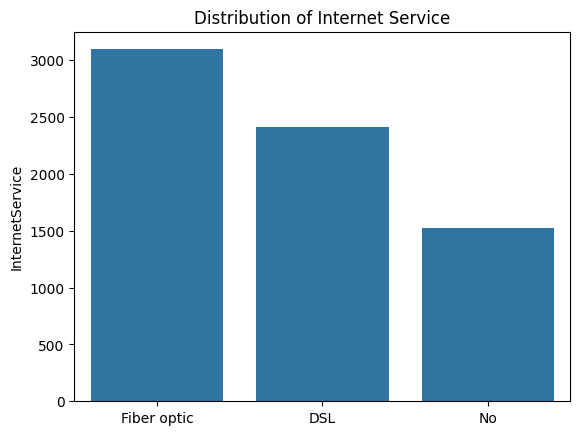

In [17]:
sns.barplot(data['InternetService'].value_counts())
plt.title('Distribution of Internet Service')
plt.show()

**Distribution of all columns of Customer Churn Dataset**

In [18]:
j=1
plt.figure(figsize=(20,40))
for i in data.columns:
  if data[i].dtype=='object':
    plt.subplot(8,2,j)
    sns.barplot(data[i].value_counts())
    plt.title(i)
    j+=1
plt.show()

Text(0.5, 1.0, 'Distribution of TotalCharges')

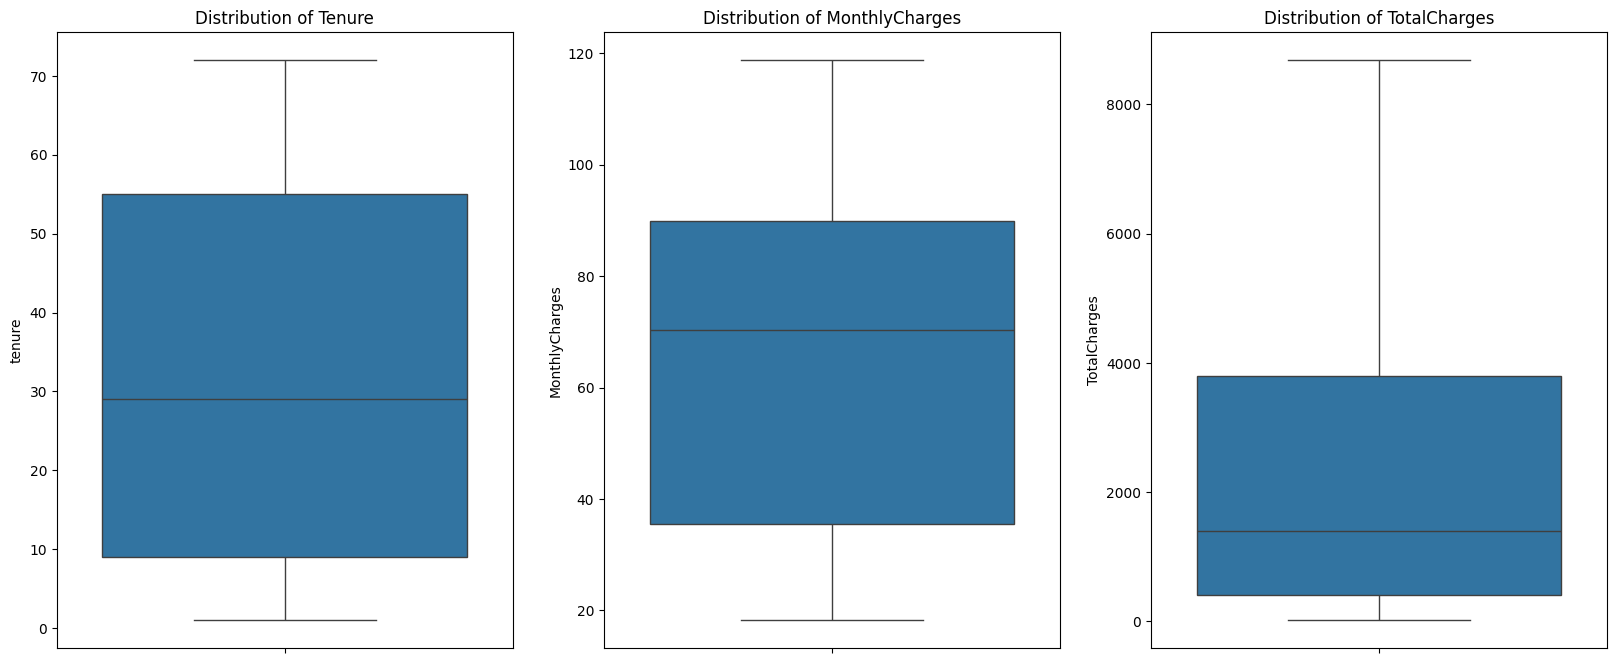

In [19]:
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.boxplot(data['tenure'])
plt.title('Distribution of Tenure')

plt.subplot(1,3,2)
sns.boxplot(data['MonthlyCharges'])
plt.title('Distribution of MonthlyCharges')

plt.subplot(1,3,3)
sns.boxplot(data['TotalCharges'])
plt.title('Distribution of TotalCharges')

In [20]:
data['Churn'].value_counts() #class imbalance

No     5163
Yes    1869
Name: Churn, dtype: int64

In [21]:
# Data Labelling

le=LabelEncoder()
for i in data.columns:
  if data[i].dtype=='object':
    data[i]=le.fit_transform(data[i])


#Model Building - Model 1

In [69]:
x1=data.loc[:,['tenure']]
Y=data.iloc[:,-1]

In [70]:
# Preprocess input
sc=StandardScaler()
x1=sc.fit_transform(x1)

#Preprocess Output
Y=tf.keras.utils.to_categorical(Y)

In [71]:
#splitting data into training and testing
x_train,x_test,y_train,y_test=train_test_split(x1,Y,test_size=0.3,random_state=24,stratify=Y)

**A sequential model using Keras, to find out if the customer would churn or not, using
‘tenure’ as the feature and ‘Churn’ as the dependent/target column**

In [72]:
#del model_1

In [73]:
# Modelling

model_1=tf.keras.models.Sequential()
model_1.add(tf.keras.layers.Dense(12,input_shape=(1,),activation='relu',name='Input'))
model_1.add(tf.keras.layers.Dense(16,activation='relu',name='Hidden1'))
model_1.add(tf.keras.layers.Dense(8,activation='relu',name='Hidden2'))
model_1.add(tf.keras.layers.Dense(2,activation='softmax',name='Output'))
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 12)                24        
                                                                 
 Hidden1 (Dense)             (None, 16)                208       
                                                                 
 Hidden2 (Dense)             (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 2)                 18        
                                                                 
Total params: 386 (1.51 KB)
Trainable params: 386 (1.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
#compile the model
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer='adam',metrics=['acc'])

In [75]:
#model fitting
model_1.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
154/154 [==============================] - 4s 5ms/step - loss: 0.5788 - acc: 0.7343 - val_loss: 0.5098 - val_acc: 0.7341
Epoch 2/150
154/154 [==============================] - 0s 3ms/step - loss: 0.5167 - acc: 0.7345 - val_loss: 0.5044 - val_acc: 0.7630
Epoch 3/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5144 - acc: 0.7432 - val_loss: 0.5026 - val_acc: 0.7526
Epoch 4/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5122 - acc: 0.7517 - val_loss: 0.5018 - val_acc: 0.7526
Epoch 5/150
154/154 [==============================] - 0s 3ms/step - loss: 0.5120 - acc: 0.7471 - val_loss: 0.5017 - val_acc: 0.7526
Epoch 6/150
154/154 [==============================] - 0s 3ms/step - loss: 0.5120 - acc: 0.7527 - val_loss: 0.5015 - val_acc: 0.7526
Epoch 7/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5122 - acc: 0.7420 - val_loss: 0.5028 - val_acc: 0.7569
Epoch 8/150
154/154 [==============================] - 0s 3ms/step - 

**Plotting of Losses and Accuracies**

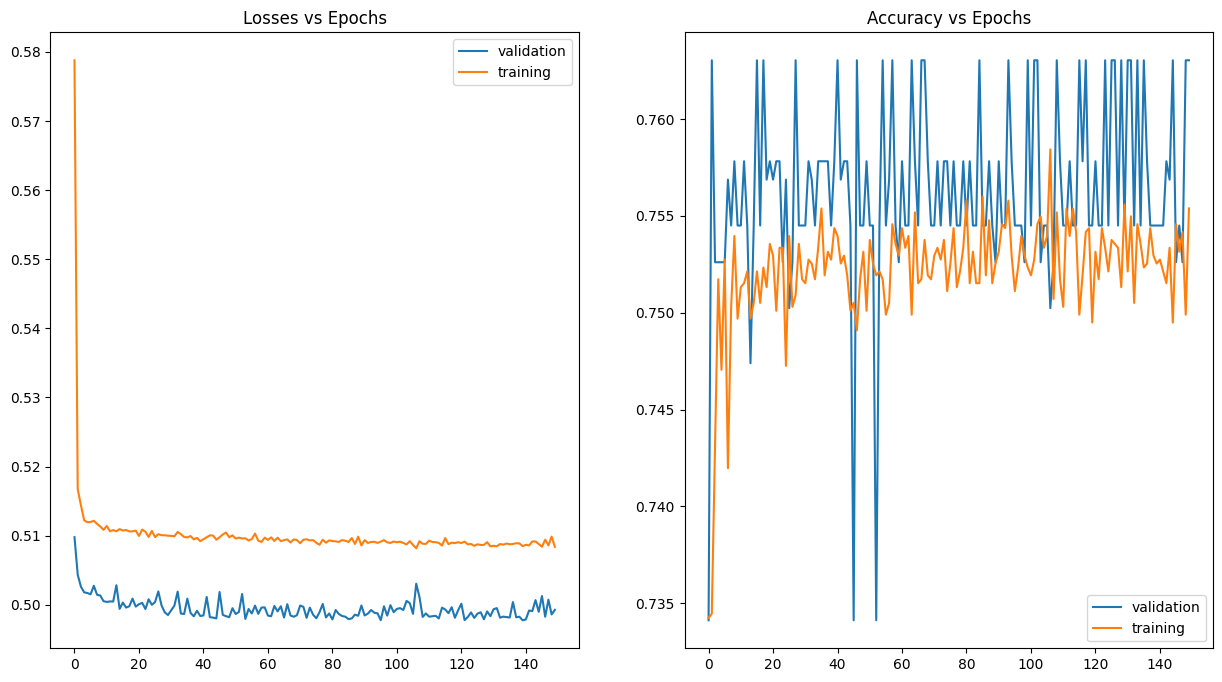

In [76]:
# Plotting of Loss and Accuracy
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(model_1.history.history['val_loss'],label='validation')
plt.plot(model_1.history.history['loss'],label='training')
plt.title('Losses vs Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(model_1.history.history['val_acc'],label='validation')
plt.plot(model_1.history.history['acc'],label='training')
plt.title('Accuracy vs Epochs')
plt.legend()

**Mean accuracy of Model 1**

In [77]:
print('mean_accuracy is: ',np.mean(model_1.history.history['val_acc']))

mean_accuracy is:  0.7563664964834849


**Evaluation of Test set**

66/66 [==============================] - 0s 1ms/step


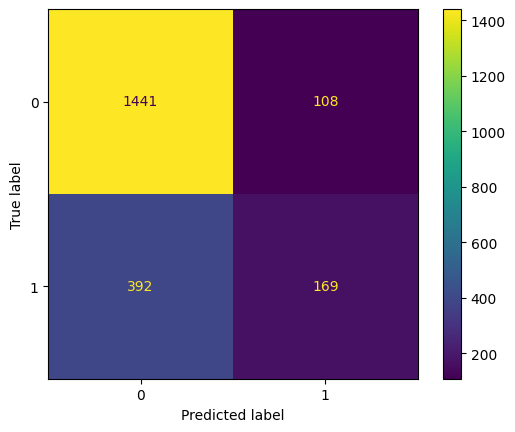

In [78]:
y_pred=np.argmax(model_1.predict(x_test),axis=1)
y_true=np.argmax(y_test,axis=1)

#confusion matrix
cm=confusion_matrix(y_true,y_pred)
ConfusionMatrixDisplay(cm).plot()


In [79]:
print(classification_report(y_true,y_pred))   #classification report

              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1549
           1       0.61      0.30      0.40       561

    accuracy                           0.76      2110
   macro avg       0.70      0.62      0.63      2110
weighted avg       0.74      0.76      0.73      2110



# MODEL BUILDING- MODEL_2

 **Using dropouts after every layer**

In [88]:
#del model_2

In [89]:
# Modelling

model_2=tf.keras.models.Sequential()
model_2.add(tf.keras.layers.Dense(12,input_shape=(1,),activation='relu',name='Input'))
model_2.add(tf.keras.layers.Dropout(0.3))
model_2.add(tf.keras.layers.Dense(8,activation='relu',name='Hidden1'))
model_2.add(tf.keras.layers.Dropout(0.2))
model_2.add(tf.keras.layers.Dense(2,activation='softmax',name='Output'))
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 12)                24        
                                                                 
 dropout_4 (Dropout)         (None, 12)                0         
                                                                 
 Hidden1 (Dense)             (None, 8)                 104       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 Output (Dense)              (None, 2)                 18        
                                                                 
Total params: 146 (584.00 Byte)
Trainable params: 146 (584.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [90]:
# compile the model
model_2.compile(optimizer='adam',
                loss=tf.keras.losses.categorical_crossentropy,
                metrics=['acc'])

In [91]:
model_2.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5852 - acc: 0.7123 - val_loss: 0.5251 - val_acc: 0.7341
Epoch 2/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5445 - acc: 0.7328 - val_loss: 0.5153 - val_acc: 0.7341
Epoch 3/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5385 - acc: 0.7338 - val_loss: 0.5126 - val_acc: 0.7341
Epoch 4/150
154/154 [==============================] - 1s 4ms/step - loss: 0.5328 - acc: 0.7385 - val_loss: 0.5083 - val_acc: 0.7341
Epoch 5/150
154/154 [==============================] - 1s 3ms/step - loss: 0.5311 - acc: 0.7367 - val_loss: 0.5080 - val_acc: 0.7341
Epoch 6/150
154/154 [==============================] - 0s 2ms/step - loss: 0.5266 - acc: 0.7341 - val_loss: 0.5062 - val_acc: 0.7341
Epoch 7/150
154/154 [==============================] - 0s 3ms/step - loss: 0.5288 - acc: 0.7408 - val_loss: 0.5068 - val_acc: 0.7341
Epoch 8/150
154/154 [==============================] - 0s 3ms/step - 

**Plot of Losses and Accuracies**

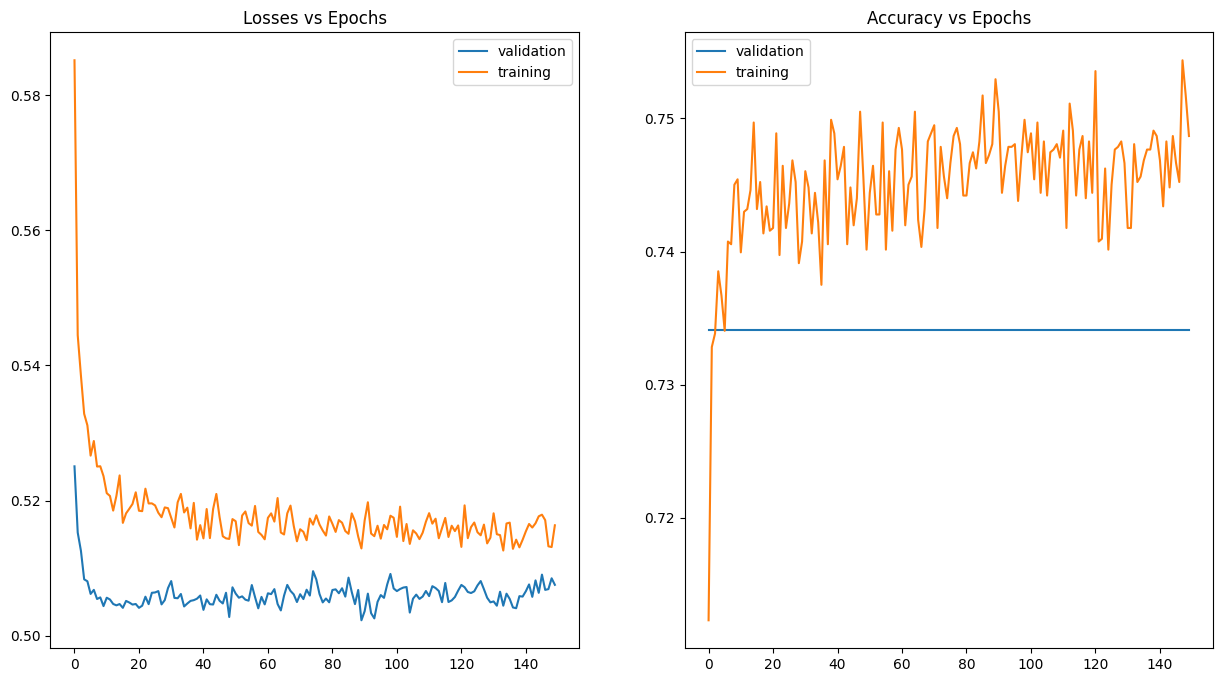

In [92]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(model_2.history.history['val_loss'],label='validation')
plt.plot(model_2.history.history['loss'],label='training')
plt.title('Losses vs Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(model_2.history.history['val_acc'],label='validation')
plt.plot(model_2.history.history['acc'],label='training')
plt.title('Accuracy vs Epochs')
plt.legend()

**Mean Accuracy of Model 2**

In [93]:
print('mean_accuracy is: ',np.mean(model_2.history.history['val_acc']))

mean_accuracy is:  0.7341232299804688


**Evaluation of Test Dataset**

66/66 [==============================] - 0s 1ms/step


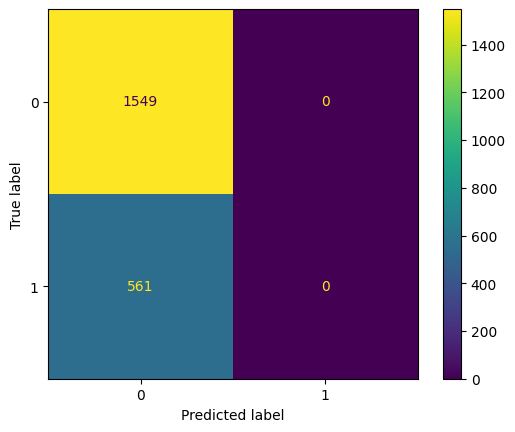

In [94]:
y_pred=np.argmax(model_2.predict(x_test),axis=1)
y_true=np.argmax(y_test,axis=1)

#confusion matrix
cm=confusion_matrix(y_true,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [95]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



# MODEL BUILDING- MODEL 3

**3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and
‘Churn’ as the dependent/target column**

In [106]:
x2=data[['tenure','MonthlyCharges','TotalCharges']]
x2=sc.fit_transform(x2)   # scaling the data

In [107]:
#splitting of data
x_train,x_test,y_train,y_test=train_test_split(x2,Y,test_size=0.3,random_state=100,stratify=Y)

In [108]:
#del model_3

In [109]:
# Modelling

model_3=tf.keras.models.Sequential()
model_3.add(tf.keras.layers.Dense(20,input_shape=(3,),activation='relu',name='Input'))
model_3.add(tf.keras.layers.Dense(16,activation='relu',name='Hidden1'))
model_3.add(tf.keras.layers.Dense(8,activation='relu',name='Hidden2'))
model_3.add(tf.keras.layers.Dense(2,activation='softmax',name='Output'))
model_3.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (Dense)               (None, 20)                80        
                                                                 
 Hidden1 (Dense)             (None, 16)                336       
                                                                 
 Hidden2 (Dense)             (None, 8)                 136       
                                                                 
 Output (Dense)              (None, 2)                 18        
                                                                 
Total params: 570 (2.23 KB)
Trainable params: 570 (2.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [110]:
# compile the model
model_3.compile(optimizer='adam',
                loss=tf.keras.losses.categorical_crossentropy,
                metrics=['acc'])

In [111]:
#model fitting
model_3.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
154/154 [==============================] - 2s 4ms/step - loss: 0.5090 - acc: 0.7448 - val_loss: 0.4693 - val_acc: 0.7943
Epoch 2/150
154/154 [==============================] - 0s 3ms/step - loss: 0.4588 - acc: 0.7826 - val_loss: 0.4538 - val_acc: 0.7891
Epoch 3/150
154/154 [==============================] - 1s 3ms/step - loss: 0.4524 - acc: 0.7828 - val_loss: 0.4515 - val_acc: 0.7943
Epoch 4/150
154/154 [==============================] - 0s 3ms/step - loss: 0.4505 - acc: 0.7830 - val_loss: 0.4542 - val_acc: 0.7905
Epoch 5/150
154/154 [==============================] - 0s 3ms/step - loss: 0.4503 - acc: 0.7865 - val_loss: 0.4482 - val_acc: 0.7929
Epoch 6/150
154/154 [==============================] - 1s 4ms/step - loss: 0.4495 - acc: 0.7834 - val_loss: 0.4473 - val_acc: 0.7938
Epoch 7/150
154/154 [==============================] - 1s 5ms/step - loss: 0.4477 - acc: 0.7855 - val_loss: 0.4524 - val_acc: 0.7900
Epoch 8/150
154/154 [==============================] - 1s 6ms/step - 

**Plot of losses and Accuracies**

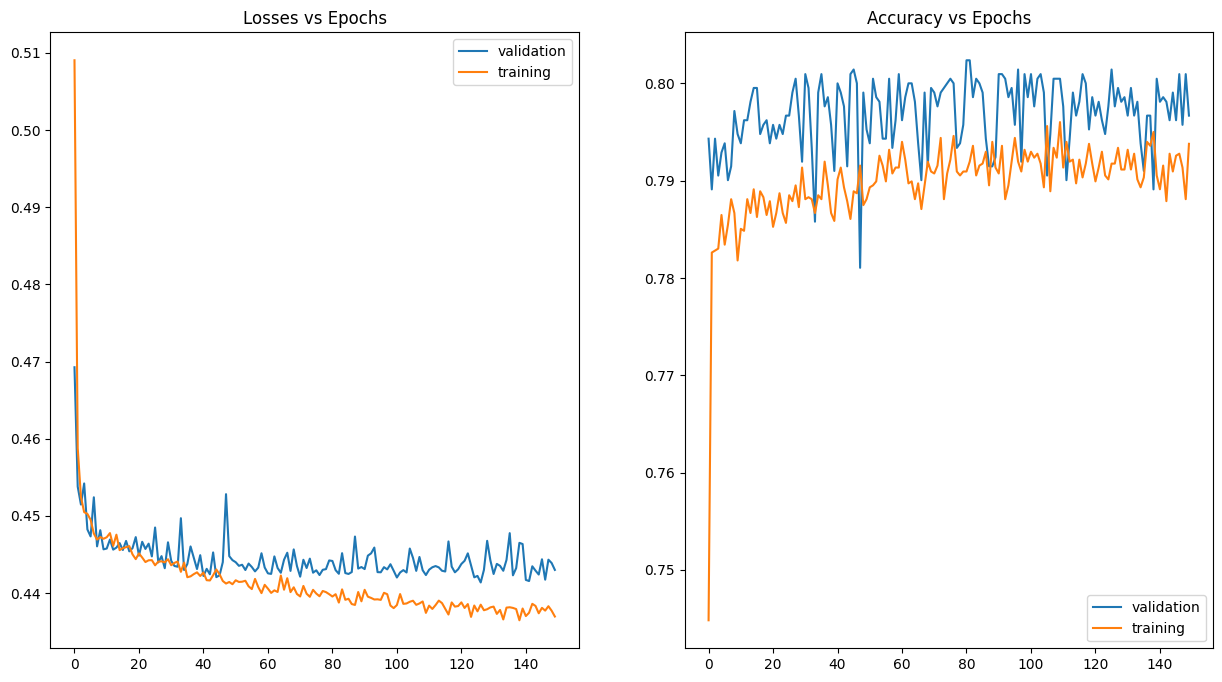

In [112]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.plot(model_3.history.history['val_loss'],label='validation')
plt.plot(model_3.history.history['loss'],label='training')
plt.title('Losses vs Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(model_3.history.history['val_acc'],label='validation')
plt.plot(model_3.history.history['acc'],label='training')
plt.title('Accuracy vs Epochs')
plt.legend()

**Mean Accuracy of Model 3**

In [113]:
print('mean_accuracy is: ',np.mean(model_3.history.history['val_acc']))

mean_accuracy is:  0.7969004754225413


**Evaluation of Test Dataset**

66/66 [==============================] - 0s 1ms/step


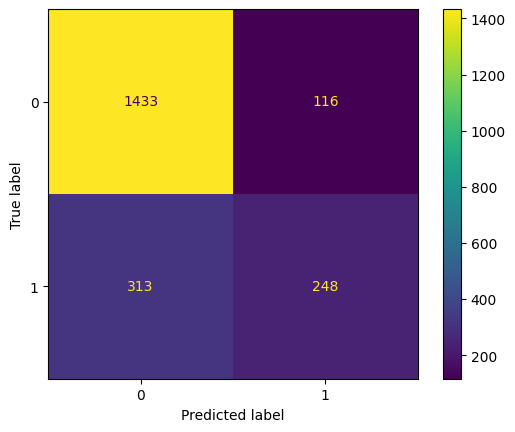

In [114]:
y_pred=np.argmax(model_3.predict(x_test),axis=1)
y_true=np.argmax(y_test,axis=1)

#confusion matrix
cm=confusion_matrix(y_true,y_pred)
ConfusionMatrixDisplay(cm).plot()

In [115]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1549
           1       0.68      0.44      0.54       561

    accuracy                           0.80      2110
   macro avg       0.75      0.68      0.70      2110
weighted avg       0.78      0.80      0.78      2110



#**CONCLUSION:**
*   The mean accuracy of model_1 gives mean validation accuracy of 75.63%
*   The mean accuracy of model_2 gives mean validation accuracy of 73.41%
which is less than model_1. This may be because of the Dropout layer used after input and hidden layer.

*  The mean accuracy of model_3 gives mean validation accuracy of 79.69%
*   Model 3 gives maximum accuracy. This may be because of the more features used in modelling.

*  The second model gives zero precision and recall for label 1 because of the dropouts of the neurons by 30 and 20 percent.
*   The third model gives maximum F1 score for label 1 which is the harmonic mean of Precision and Recall.
